# Lab | Model generation and validation

In this challenge, we will continue to work with customer data from an insurance company. We will use the dataset called marketing_customer_analysis.csv, which can be found at the following link:

https://raw.githubusercontent.com/data-bootcamp-v4/data/main/marketing_customer_analysis.csv

This dataset contains information such as customer demographics, policy details, vehicle information, and the customer's response to the last marketing campaign. Our goal is to explore and analyze this data by first performing data cleaning, formatting, and structuring.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%load_ext autoreload
%autoreload 2
%run functions.py

In [2]:
url = 'https://raw.githubusercontent.com/data-bootcamp-v4/data/main/marketing_customer_analysis.csv'

df = pd.read_csv(url)

df

,Unnamed: 0,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,...,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size,Vehicle Type
0,0,DK49336,Arizona,4809.216960,No,Basic,College,2/18/11,Employed,M,...,0.0,9,Corporate Auto,Corporate L3,Offer3,Agent,292.800000,Four-Door Car,Medsize,NaN
1,1,KX64629,California,2228.525238,No,Basic,College,1/18/11,Unemployed,F,...,0.0,1,Personal Auto,Personal L3,Offer4,Call Center,744.924331,Four-Door Car,Medsize,NaN
2,2,LZ68649,Washington,14947.917300,No,Basic,Bachelor,2/10/11,Employed,M,...,0.0,2,Personal Auto,Personal L3,Offer3,Call Center,480.000000,SUV,Medsize,A
3,3,XL78013,Oregon,22332.439460,Yes,Extended,College,1/11/11,Employed,M,...,0.0,2,Corporate Auto,Corporate L3,Offer2,Branch,484.013411,Four-Door Car,Medsize,A
4,4,QA50777,Oregon,9025.067525,No,Premium,Bachelor,1/17/11,Medical Leave,F,...,NaN,7,Personal Auto,Personal L2,Offer1,Branch,707.925645,Four-Door Car,Medsize,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10905,10905,FE99816,Nevada,15563.369440,No,Premium,Bachelor,1/19/11,Unemployed,F,...,NaN,7,Personal Auto,Personal L1,Offer3,Web,1214.400000,Luxury Car,Medsize,A
10906,10906,KX53892,Oregon,5259.444853,No,Basic,College,1/6/11,Employed,F,...,0.0,6,Personal Auto,Personal L3,Offer2,Branch,273.018929,Four-Door Car,Medsize,A
10907,10907,TL39050,Arizona,23893.304100,No,Extended,Bachelor,2/6/11,Employed,F,...,0.0,2,Corporate Auto,Corporate L3,Offer1,Web,381.306996,Luxury SUV,Medsize,NaN
10908,10908,WA60547,California,11971.977650,No,Premium,College,2/13/11,Employed,F,...,4.0,6,Personal Auto,Personal L1,Offer1,Branch,618.288849,SUV,Medsize,A


In [3]:
# Removing 'Unnamed: 0' column

df = df.drop('Unnamed: 0', axis=1)

df.head()

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size,Vehicle Type
0,DK49336,Arizona,4809.216960,No,Basic,College,2/18/11,Employed,M,48029,...,0.0,9,Corporate Auto,Corporate L3,Offer3,Agent,292.800000,Four-Door Car,Medsize,NaN
1,KX64629,California,2228.525238,No,Basic,College,1/18/11,Unemployed,F,0,...,0.0,1,Personal Auto,Personal L3,Offer4,Call Center,744.924331,Four-Door Car,Medsize,NaN
2,LZ68649,Washington,14947.917300,No,Basic,Bachelor,2/10/11,Employed,M,22139,...,0.0,2,Personal Auto,Personal L3,Offer3,Call Center,480.000000,SUV,Medsize,A
3,XL78013,Oregon,22332.439460,Yes,Extended,College,1/11/11,Employed,M,49078,...,0.0,2,Corporate Auto,Corporate L3,Offer2,Branch,484.013411,Four-Door Car,Medsize,A
4,QA50777,Oregon,9025.067525,No,Premium,Bachelor,1/17/11,Medical Leave,F,23675,...,NaN,7,Personal Auto,Personal L2,Offer1,Branch,707.925645,Four-Door Car,Medsize,NaN


In [4]:
# Checking for nulls and duplicates

print('Number of null values by column:\n', df.isna().sum(), '\n')

print('Number of duplicates:', df.duplicated().sum())

Number of null values by column:
 Customer                            0
State                             631
Customer Lifetime Value             0
Response                          631
Coverage                            0
Education                           0
Effective To Date                   0
EmploymentStatus                    0
Gender                              0
Income                              0
Location Code                       0
Marital Status                      0
Monthly Premium Auto                0
Months Since Last Claim           633
Months Since Policy Inception       0
Number of Open Complaints         633
Number of Policies                  0
Policy Type                         0
Policy                              0
Renew Offer Type                    0
Sales Channel                       0
Total Claim Amount                  0
Vehicle Class                     622
Vehicle Size                      622
Vehicle Type                     5482
dtype: int64 

N

In [5]:
# Applying master cleaning function to the dataframe

df = clean_dataframe(df)

df.head()

,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,income,...,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size,vehicle_type
0,DK49336,Arizona,4809.216960,No,Basic,College,2/18/11,Employed,M,48029,...,0.0,9,Corporate Auto,Corporate L3,Offer3,Agent,292.800000,Four-Door Car,Medsize,NaN
1,KX64629,California,2228.525238,No,Basic,College,1/18/11,Unemployed,F,0,...,0.0,1,Personal Auto,Personal L3,Offer4,Call Center,744.924331,Four-Door Car,Medsize,NaN
2,LZ68649,Washington,14947.917300,No,Basic,Bachelor,2/10/11,Employed,M,22139,...,0.0,2,Personal Auto,Personal L3,Offer3,Call Center,480.000000,SUV,Medsize,A
3,XL78013,Oregon,22332.439460,Yes,Extended,College,1/11/11,Employed,M,49078,...,0.0,2,Corporate Auto,Corporate L3,Offer2,Branch,484.013411,Four-Door Car,Medsize,A
4,QA50777,Oregon,9025.067525,No,Premium,Bachelor,1/17/11,Medical Leave,F,23675,...,NaN,7,Personal Auto,Personal L2,Offer1,Branch,707.925645,Four-Door Car,Medsize,NaN


In [6]:
# Checking again for nulls and duplicates

print('Number of null values by column:\n', df.isna().sum(), '\n')

print('Number of duplicates:', df.duplicated().sum())

Number of null values by column:
 customer                            0
state                             614
customer_lifetime_value             0
response                          614
coverage                            0
education                           0
effective_to_date                   0
employmentstatus                    0
gender                              0
income                              0
location_code                       0
marital_status                      0
monthly_premium_auto                0
months_since_last_claim           623
months_since_policy_inception       0
number_of_open_complaints         623
number_of_policies                  0
policy_type                         0
policy                              0
renew_offer_type                    0
sales_channel                       0
total_claim_amount                  0
vehicle_class                     608
vehicle_size                      608
vehicle_type                     5465
dtype: int64 

N

In [7]:
nullcols = ['state', 'response', 'months_since_last_claim', 'number_of_open_complaints', 'vehicle_class', 'vehicle_size', 'vehicle_type']

nulls1 = df[nullcols][df['months_since_last_claim'].isna()]
nulls1.head()

,state,response,months_since_last_claim,number_of_open_complaints,vehicle_class,vehicle_size,vehicle_type
4,Oregon,No,NaN,NaN,Four-Door Car,Medsize,NaN
23,California,No,NaN,NaN,Four-Door Car,Medsize,NaN
51,Arizona,No,NaN,NaN,Four-Door Car,Large,A
59,Arizona,No,NaN,NaN,Four-Door Car,Medsize,NaN
67,Washington,Yes,NaN,NaN,Two-Door Car,Medsize,A


In [8]:
nulls2 = df[nullcols][df['state'].isna()]
nulls2.head()

,state,response,months_since_last_claim,number_of_open_complaints,vehicle_class,vehicle_size,vehicle_type
5,NaN,NaN,2.0,0.0,Four-Door Car,Medsize,A
11,NaN,NaN,5.0,0.0,Two-Door Car,Medsize,NaN
58,NaN,NaN,10.0,0.0,Two-Door Car,Small,NaN
62,NaN,NaN,8.0,0.0,Two-Door Car,Medsize,NaN
126,NaN,NaN,0.0,1.0,Four-Door Car,Medsize,A


In [9]:
nulls3 = df[nullcols][df['vehicle_class'].isna()]
nulls3.head()

,state,response,months_since_last_claim,number_of_open_complaints,vehicle_class,vehicle_size,vehicle_type
87,Oregon,No,NaN,NaN,NaN,NaN,NaN
88,Arizona,Yes,NaN,NaN,NaN,NaN,NaN
89,Arizona,No,7.0,0.0,NaN,NaN,A
97,Oregon,No,21.0,0.0,NaN,NaN,A
148,California,No,17.0,1.0,NaN,NaN,A


In [10]:
# Checking summary statistics for numeric columns with null values to decide imputing strategy

df[nullcols].describe()

,months_since_last_claim,number_of_open_complaints
count,10250.000000,10250.000000
mean,15.145073,0.383512
std,10.078893,0.911190
min,0.000000,0.000000
25%,6.000000,0.000000
50%,14.000000,0.000000
75%,23.000000,0.000000
max,35.000000,5.000000


In [11]:
# Filling 'months_since_last_claim' and 'number_of_open_complaints' columns nulls with the median value

median_last_claim = df['months_since_last_claim'].median()
median_open_complaints = df['number_of_open_complaints'].median()

df['months_since_last_claim'] = df['months_since_last_claim'].fillna(median_last_claim)
df['number_of_open_complaints'] = df['number_of_open_complaints'].fillna(median_open_complaints)

df.isna().sum()

customer                            0
state                             614
customer_lifetime_value             0
response                          614
coverage                            0
education                           0
effective_to_date                   0
employmentstatus                    0
gender                              0
income                              0
location_code                       0
marital_status                      0
monthly_premium_auto                0
months_since_last_claim             0
months_since_policy_inception       0
number_of_open_complaints           0
number_of_policies                  0
policy_type                         0
policy                              0
renew_offer_type                    0
sales_channel                       0
total_claim_amount                  0
vehicle_class                     608
vehicle_size                      608
vehicle_type                     5465
dtype: int64

In [12]:
# Checking unique value counts for categorical columns with missing values to decide an strategy

cat_cols_nulls = ['state', 'response', 'vehicle_class', 'vehicle_size', 'vehicle_type']

for col in cat_cols_nulls:
    print(df[col].value_counts(), '\n\n')

state
California    3548
Oregon        2897
Arizona       1934
Nevada         992
Washington     888
Name: count, dtype: int64 


response
No     8795
Yes    1464
Name: count, dtype: int64 


vehicle_class
Four-Door Car    5200
Two-Door Car     2112
SUV              2009
Luxury            944
Name: count, dtype: int64 


vehicle_size
Medsize    7233
Small      1962
Large      1070
Name: count, dtype: int64 


vehicle_type
A    5408
Name: count, dtype: int64 




In [13]:
# Filling categorical columns missing values with their respective mode

mode_state = df['state'].mode()[0]
mode_response = df['response'].mode()[0]
mode_vehicle_class = df['vehicle_class'].mode()[0]
mode_vehicle_size = df['vehicle_size'].mode()[0]

df['state'] = df['state'].fillna(mode_state)
df['response'] = df['response'].fillna(mode_response)
df['vehicle_class'] = df['vehicle_class'].fillna(mode_vehicle_class)
df['vehicle_size'] = df['vehicle_size'].fillna(mode_vehicle_size)

df.isna().sum()

customer                            0
state                               0
customer_lifetime_value             0
response                            0
coverage                            0
education                           0
effective_to_date                   0
employmentstatus                    0
gender                              0
income                              0
location_code                       0
marital_status                      0
monthly_premium_auto                0
months_since_last_claim             0
months_since_policy_inception       0
number_of_open_complaints           0
number_of_policies                  0
policy_type                         0
policy                              0
renew_offer_type                    0
sales_channel                       0
total_claim_amount                  0
vehicle_class                       0
vehicle_size                        0
vehicle_type                     5465
dtype: int64

In [14]:
# Removing 'vehicle_type' column

df = df.drop(columns='vehicle_type')
df.head()

,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,income,...,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size
0,DK49336,Arizona,4809.216960,No,Basic,College,2/18/11,Employed,M,48029,...,52,0.0,9,Corporate Auto,Corporate L3,Offer3,Agent,292.800000,Four-Door Car,Medsize
1,KX64629,California,2228.525238,No,Basic,College,1/18/11,Unemployed,F,0,...,26,0.0,1,Personal Auto,Personal L3,Offer4,Call Center,744.924331,Four-Door Car,Medsize
2,LZ68649,Washington,14947.917300,No,Basic,Bachelor,2/10/11,Employed,M,22139,...,31,0.0,2,Personal Auto,Personal L3,Offer3,Call Center,480.000000,SUV,Medsize
3,XL78013,Oregon,22332.439460,Yes,Extended,College,1/11/11,Employed,M,49078,...,3,0.0,2,Corporate Auto,Corporate L3,Offer2,Branch,484.013411,Four-Door Car,Medsize
4,QA50777,Oregon,9025.067525,No,Premium,Bachelor,1/17/11,Medical Leave,F,23675,...,31,0.0,7,Personal Auto,Personal L2,Offer1,Branch,707.925645,Four-Door Car,Medsize


1. Create a new DataFrame that only includes customers who have a total_claim_amount greater than $1,000 and have a response of "Yes" to the last marketing campaign.

In [15]:
# Creating df with > 1000 'total_claim_amount' and 'Yes' in 'response'

df_filter1 = df[(df['total_claim_amount'] > 1000) & (df['response'] == 'Yes')]
df_filter1.head()

,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,income,...,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size
189,OK31456,California,11009.130490,Yes,Premium,Bachelor,1/24/11,Employed,F,51643,...,43,0.0,1,Corporate Auto,Corporate L3,Offer2,Agent,1358.400000,Luxury,Medsize
236,YJ16163,Oregon,11009.130490,Yes,Premium,Bachelor,1/24/11,Employed,F,51643,...,43,0.0,1,Special Auto,Special L3,Offer2,Agent,1358.400000,Luxury,Medsize
419,GW43195,Oregon,25807.063000,Yes,Extended,College,2/13/11,Employed,F,71210,...,89,1.0,2,Personal Auto,Personal L2,Offer1,Branch,1027.200000,Luxury,Small
442,IP94270,Arizona,13736.132500,Yes,Premium,Master,2/13/11,Disabled,F,16181,...,79,0.0,8,Personal Auto,Personal L2,Offer1,Web,1261.319869,SUV,Medsize
587,FJ28407,California,5619.689084,Yes,Premium,High School or Below,1/26/11,Unemployed,M,0,...,5,0.0,1,Personal Auto,Personal L1,Offer2,Web,1027.000029,SUV,Medsize


2. Using the original Dataframe, analyze the average total_claim_amount by each policy type and gender for customers who have responded "Yes" to the last marketing campaign. Write your conclusions.

In [16]:
df_filter2 = df[df['response'] == 'Yes'].groupby(['policy_type', 'gender'])['total_claim_amount'].agg('mean')
df_filter2 = pd.DataFrame(df_filter2)
df_filter2

total_claim_amount
policy_type    gender                    
Corporate Auto F               433.738499
               M               407.829300
Personal Auto  F               452.755476
               M               457.010178
Special Auto   F               453.280164
               M               429.527942

3. Analyze the total number of customers who have policies in each state, and then filter the results to only include states where there are more than 500 customers.

In [17]:
# Total number of customers by state

df_filter_state = df['state'].value_counts()
df_filter_state

state
California    4162
Oregon        2897
Arizona       1934
Nevada         992
Washington     888
Name: count, dtype: int64

In [18]:
# Filtering by states with > 500 customers

mask = df_filter_state > 500

df_filter_state_500 = df_filter_state[mask]
df_filter_state_500

state
California    4162
Oregon        2897
Arizona       1934
Nevada         992
Washington     888
Name: count, dtype: int64

4. Find the maximum, minimum, and median customer lifetime value by education level and gender. Write your conclusions.

In [19]:
# Grouping by education level and gender, and applying aggregate functions

df_aggregate = df.groupby(['education', 'gender'])['customer_lifetime_value'].agg(['max', 'min', 'median']).round(2)
df_aggregate

max      min   median
education            gender                            
Bachelor             F       73225.96  1904.00  5632.61
                     M       67907.27  1898.01  5548.03
College              F       61850.19  1898.68  5623.61
                     M       61134.68  1918.12  6005.85
Doctor               F       44856.11  2395.57  5332.46
                     M       32677.34  2267.60  5577.67
High School or Below F       55277.45  2144.92  6035.09
                     M       83325.38  1940.98  6286.73
Master               F       51016.07  2417.78  5729.86
                     M       50568.26  2272.31  5579.10

## Bonus

5. The marketing team wants to analyze the number of policies sold by state and month. Present the data in a table where the months are arranged as columns and the states are arranged as rows.

6.  Display a new DataFrame that contains the number of policies sold by month, by state, for the top 3 states with the highest number of policies sold.

*Hint:*
- *To accomplish this, you will first need to group the data by state and month, then count the number of policies sold for each group. Afterwards, you will need to sort the data by the count of policies sold in descending order.*
- *Next, you will select the top 3 states with the highest number of policies sold.*
- *Finally, you will create a new DataFrame that contains the number of policies sold by month for each of the top 3 states.*

7. The marketing team wants to analyze the effect of different marketing channels on the customer response rate.

Hint: You can use melt to unpivot the data and create a table that shows the customer response rate (those who responded "Yes") by marketing channel.

External Resources for Data Filtering: https://towardsdatascience.com/filtering-data-frames-in-pandas-b570b1f834b9

In [20]:
# We need to create a months column from the 'effective_to_date' column

# Converting column to datetime format
df['effective_to_date'] = pd.to_datetime(df['effective_to_date'], format='%m/%d/%y')

# Extracting month from that column to create a month col
df['month'] = df['effective_to_date'].dt.strftime('%b')
df['month']

0        Feb
1        Jan
2        Feb
3        Jan
4        Jan
        ... 
10868    Jan
10869    Jan
10870    Feb
10871    Feb
10872    Jan
Name: month, Length: 10873, dtype: object

In [21]:
# Table with months as columns and states as rows

pivot_state_row = df.pivot_table(index='state', columns='month', values='number_of_policies', aggfunc='sum')
pivot_state_row

month,Feb,Jan
state,,
Arizona,2853,3050
California,5875,6631
Nevada,1271,1493
Oregon,3959,4659
Washington,1225,1358


In [22]:
# Policies sold by month and state for the top 3 states

# Getting top 3 states
top3_states = df.groupby('state')['number_of_policies'].sum().sort_values(ascending=False)[:3]

# Creating a list with the top 3 states
list_3_states = top3_states.index.tolist()

# Displaying a dataframe with the number of policies sold each month for the top 3 states
df_top3_states = pd.DataFrame(df[df['state'].isin(list_3_states)].groupby(['state', 'month'])['number_of_policies'].agg('sum'))
df_top3_states

number_of_policies
state      month                    
Arizona    Feb                  2853
           Jan                  3050
California Feb                  5875
           Jan                  6631
Oregon     Feb                  3959
           Jan                  4659

In [23]:
# Analyze the effect of different marketing channels on the customers response rate

df_channel_response = pd.DataFrame(df.groupby(['sales_channel', 'response'])['customer'].count())
df_channel_response

customer
sales_channel response          
Agent         No            3370
              Yes            741
Branch        No            2688
              Yes            325
Call Center   No            1911
              Yes            221
Web           No            1440
              Yes            177

## EDA (Exploratory Data Analysis) 

Complete the following tasks to explore the data:
- Show DataFrame info.
- Describe DataFrame.
- Show a plot of the total number of responses.
- Show a plot of the response rate by the sales channel.
- Show a plot of the response rate by the total claim amount.
- Show a plot of the response rate by income.

In [24]:
# Showing dataframe info

df.info

<bound method DataFrame.info of       customer       state  customer_lifetime_value response  coverage  \
0      DK49336     Arizona              4809.216960       No     Basic   
1      KX64629  California              2228.525238       No     Basic   
2      LZ68649  Washington             14947.917300       No     Basic   
3      XL78013      Oregon             22332.439460      Yes  Extended   
4      QA50777      Oregon              9025.067525       No   Premium   
...        ...         ...                      ...      ...       ...   
10868  FE99816      Nevada             15563.369440       No   Premium   
10869  KX53892      Oregon              5259.444853       No     Basic   
10870  TL39050     Arizona             23893.304100       No  Extended   
10871  WA60547  California             11971.977650       No   Premium   
10872  IV32877  California              6857.519928       No     Basic   

      education effective_to_date employmentstatus gender  income  ...  \
0    

In [25]:
# Showing dataframe summary statistics

df.describe()

,customer_lifetime_value,effective_to_date,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
count,10873.000000,10873,10873.000000,10873.000000,10873.000000,10873.000000,10873.000000,10873.000000,10873.000000
mean,8016.881720,2011-01-29 22:43:58.830129664,37537.101444,93.216684,15.079463,48.098777,0.361538,2.977467,434.902879
min,1898.007675,2011-01-01 00:00:00,0.000000,61.000000,0.000000,0.000000,0.000000,1.000000,0.099007
25%,4014.453113,2011-01-16 00:00:00,0.000000,68.000000,7.000000,24.000000,0.000000,1.000000,271.014511
50%,5768.830622,2011-01-30 00:00:00,33811.000000,83.000000,14.000000,48.000000,0.000000,2.000000,383.363758
75%,8996.774075,2011-02-14 00:00:00,62262.000000,109.000000,23.000000,71.000000,0.000000,4.000000,547.200000
max,83325.381190,2011-02-28 00:00:00,99981.000000,298.000000,35.000000,99.000000,5.000000,9.000000,2893.239678
std,6884.829202,NaN,30362.078350,34.454801,9.789475,27.929932,0.889177,2.397752,292.233402


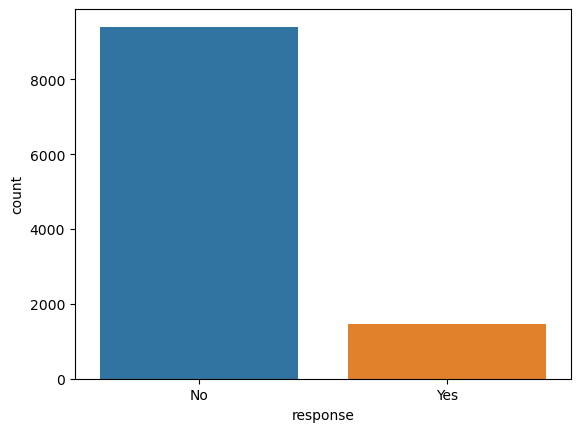

In [26]:
# Plotting responses

import seaborn as sns

fig, ax = plt.subplots()

sns.countplot(data=df, x='response')

plt.show()

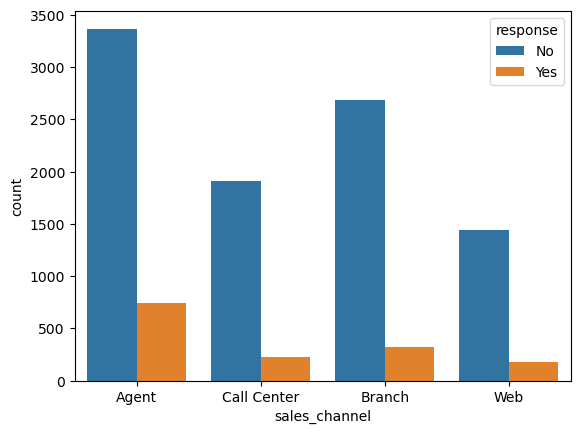

In [27]:
# Plotting response rate by sales channel

fig, ax = plt.subplots()

sns.countplot(data=df, x='sales_channel', hue='response')

plt.show()

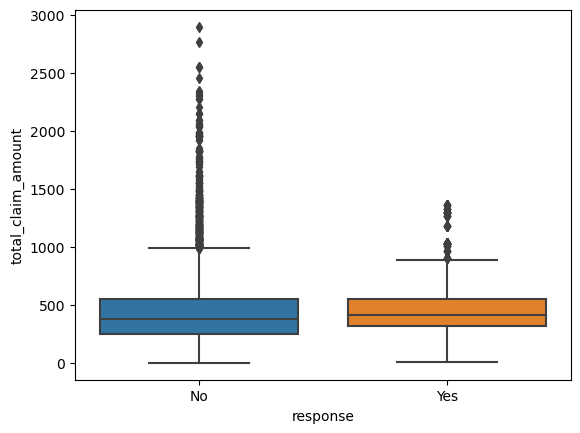

In [28]:
# Plotting response rate by customer lifetime value - boxplot

fig, ax = plt.subplots()

sns.boxplot(data=df, x='response', y='total_claim_amount')

plt.show()

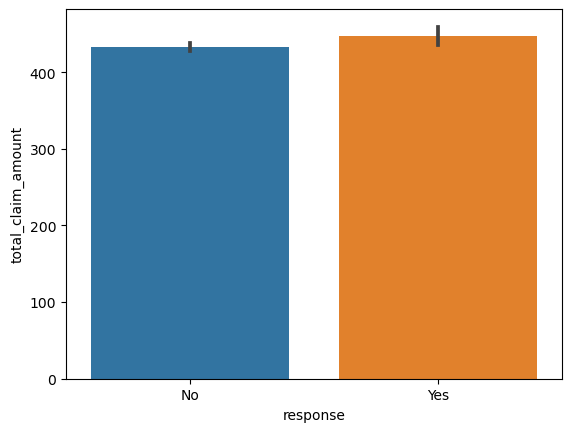

In [29]:
# Plotting response rate by customer lifetime value - barplot

fig, ax = plt.subplots()

sns.barplot(data=df, x='response', y='total_claim_amount')

plt.show()

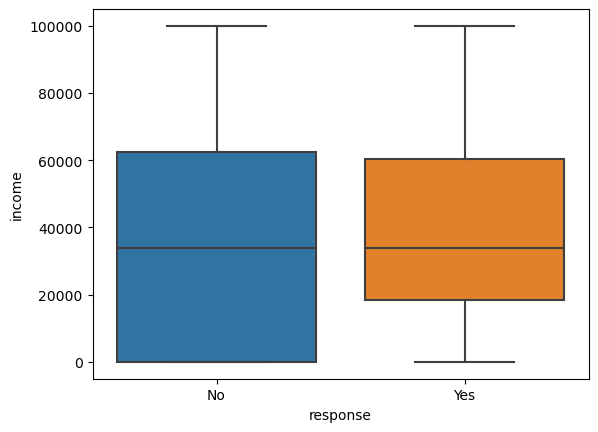

In [30]:
# Plotting response rate by income - boxplot

fig, ax = plt.subplots()

sns.boxplot(data=df, x='response', y='income')

plt.show()

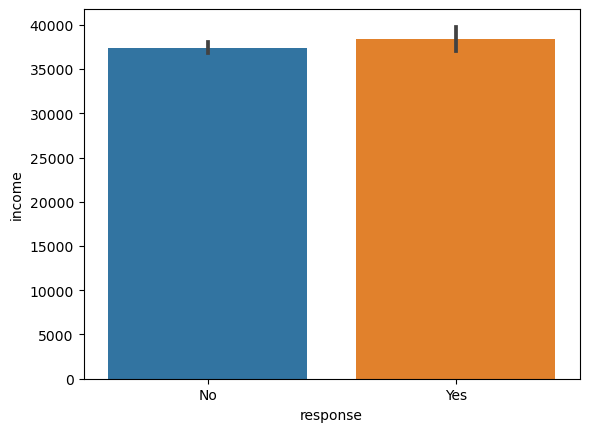

In [31]:
# Plotting response rate by income - barplot

fig, ax = plt.subplots()

sns.barplot(data=df, x='response', y='income')

plt.show()

## Lab | Data Transformations

Complete the following task
- Check the data types of the columns. Get the numeric data into dataframe called numerical and categorical columns in a dataframe called categoricals. (You can use np.number and np.object to select the numerical data types and categorical data types respectively)
- Now we will try to check the normality of the numerical variables visually
- Use seaborn library to construct distribution plots for the numerical variables
- Use Matplotlib to construct histograms
- Do the distributions for different numerical columns look symmetrical? Compute the skewness for each, and add a comment with your findings.
- For the numerical variables, check the multicollinearity between the features. Please note that we will use the column total_claim_amount later as the target variable.
- If you find a pair of columns that show a high correlation between them (greater than 0.9), drop the one that is less correlated with the column total_claim_amount. Write code for both the correlation matrix. If there is no pair of features that have a high correlation, then do not drop any features.
- Plot the heatmap of the correlation matrix after the filtering.

In [32]:
df.dtypes

customer                                 object
state                                    object
customer_lifetime_value                 float64
response                                 object
coverage                                 object
education                                object
effective_to_date                datetime64[ns]
employmentstatus                         object
gender                                   object
income                                    int32
location_code                            object
marital_status                           object
monthly_premium_auto                      int64
months_since_last_claim                 float64
months_since_policy_inception             int64
number_of_open_complaints               float64
number_of_policies                        int64
policy_type                              object
policy                                   object
renew_offer_type                         object
sales_channel                           

In [33]:
# Creating dataframe with numeric columns

df_numeric = df.select_dtypes(include=np.number)

df_numeric

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
0,4809.216960,48029,61,7.0,52,0.0,9,292.800000
1,2228.525238,0,64,3.0,26,0.0,1,744.924331
2,14947.917300,22139,100,34.0,31,0.0,2,480.000000
3,22332.439460,49078,97,10.0,3,0.0,2,484.013411
4,9025.067525,23675,117,14.0,31,0.0,7,707.925645
...,...,...,...,...,...,...,...,...
10868,15563.369440,0,253,14.0,40,0.0,7,1214.400000
10869,5259.444853,61146,65,7.0,68,0.0,6,273.018929
10870,23893.304100,39837,201,11.0,63,0.0,2,381.306996
10871,11971.977650,64195,158,0.0,27,4.0,6,618.288849


In [34]:
# Creating dataframe with categorical columns

df_categorical = df.select_dtypes(include=object)

df_categorical

,customer,state,response,coverage,education,employmentstatus,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size,month
0,DK49336,Arizona,No,Basic,College,Employed,M,Suburban,Married,Corporate Auto,Corporate L3,Offer3,Agent,Four-Door Car,Medsize,Feb
1,KX64629,California,No,Basic,College,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer4,Call Center,Four-Door Car,Medsize,Jan
2,LZ68649,Washington,No,Basic,Bachelor,Employed,M,Suburban,Single,Personal Auto,Personal L3,Offer3,Call Center,SUV,Medsize,Feb
3,XL78013,Oregon,Yes,Extended,College,Employed,M,Suburban,Single,Corporate Auto,Corporate L3,Offer2,Branch,Four-Door Car,Medsize,Jan
4,QA50777,Oregon,No,Premium,Bachelor,Medical Leave,F,Suburban,Married,Personal Auto,Personal L2,Offer1,Branch,Four-Door Car,Medsize,Jan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10868,FE99816,Nevada,No,Premium,Bachelor,Unemployed,F,Suburban,Married,Personal Auto,Personal L1,Offer3,Web,Luxury,Medsize,Jan
10869,KX53892,Oregon,No,Basic,College,Employed,F,Urban,Married,Personal Auto,Personal L3,Offer2,Branch,Four-Door Car,Medsize,Jan
10870,TL39050,Arizona,No,Extended,Bachelor,Employed,F,Rural,Married,Corporate Auto,Corporate L3,Offer1,Web,Luxury,Medsize,Feb
10871,WA60547,California,No,Premium,College,Employed,F,Urban,Divorced,Personal Auto,Personal L1,Offer1,Branch,SUV,Medsize,Feb


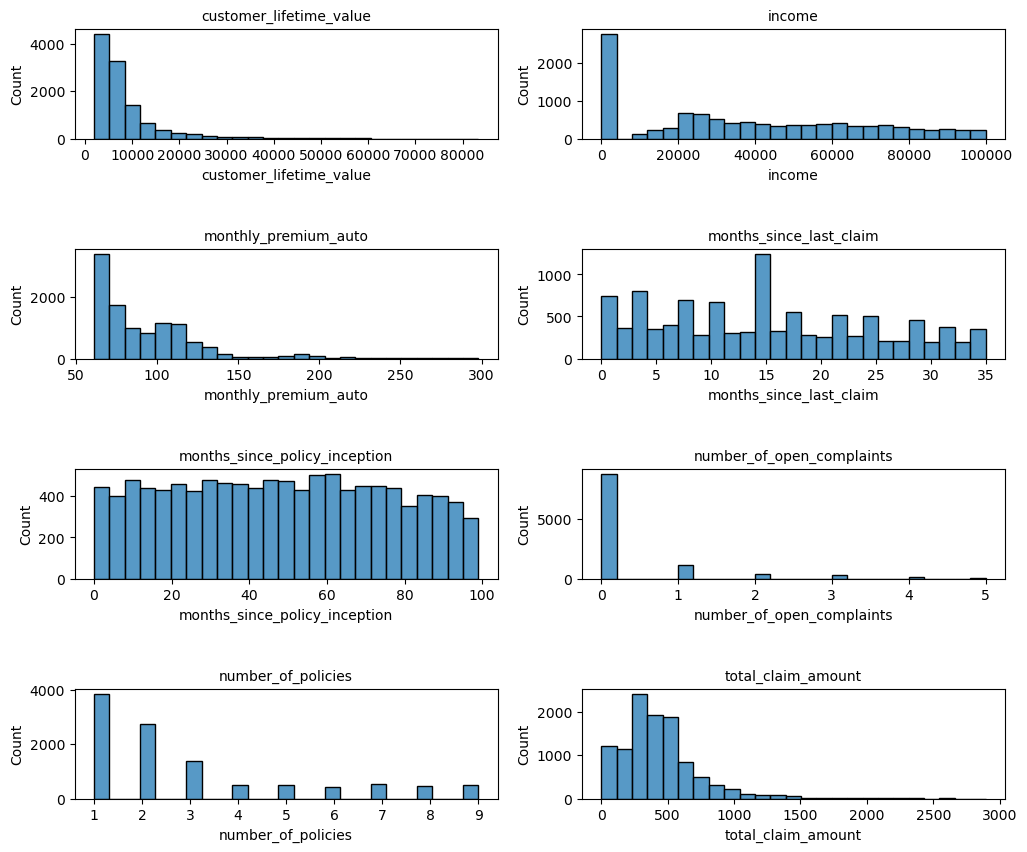

In [35]:
# Plotting histograms of numerical variables to visualize distribution

fig, axes = plt.subplots(4, 2, figsize=(12, 10))

axes = axes.flatten()

for i, col in enumerate(df_numeric.columns):
    sns.histplot(df[col], bins=25, ax=axes[i])
    axes[i].set_title(col, fontsize=10)

plt.subplots_adjust(hspace=1)    
  
plt.show()

In [36]:
# Computing skewness for each

import statsmodels.api as sm

for col in df_numeric.columns:
    print('Skewness for', col, ':',df_numeric[col].skew())

Skewness for customer_lifetime_value : 3.0036692864597163
Skewness for income : 0.285830943348204
Skewness for monthly_premium_auto : 2.115228636127636
Skewness for months_since_last_claim : 0.29893457740197954
Skewness for months_since_policy_inception : 0.03317300327123012
Skewness for number_of_open_complaints : 2.9158220579828247
Skewness for number_of_policies : 1.2432199650279439
Skewness for total_claim_amount : 1.7273385956826353


In [37]:
# Computing correlation between numeric columns

df_numeric.corr()

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
customer_lifetime_value,1.000000,0.027354,0.402617,0.016038,0.016709,-0.030861,0.016428,0.232583
income,0.027354,1.000000,-0.009929,-0.022675,-0.005992,0.007776,-0.010831,-0.354613
monthly_premium_auto,0.402617,-0.009929,1.000000,0.008356,0.019339,-0.009180,-0.020300,0.631372
months_since_last_claim,0.016038,-0.022675,0.008356,1.000000,-0.037628,0.004223,0.007428,0.011952
months_since_policy_inception,0.016709,-0.005992,0.019339,-0.037628,1.000000,0.005043,-0.010445,0.003780
number_of_open_complaints,-0.030861,0.007776,-0.009180,0.004223,0.005043,1.000000,0.002570,-0.011653
number_of_policies,0.016428,-0.010831,-0.020300,0.007428,-0.010445,0.002570,1.000000,-0.008702
total_claim_amount,0.232583,-0.354613,0.631372,0.011952,0.003780,-0.011653,-0.008702,1.000000


In [38]:
# Importing libraries and defining VIF function to compute multicolinearity

from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

def compute_vif(df: pd.DataFrame, columns: list):

    X = df.loc[:, columns]
    # the calculation of variance inflation requires a constant
    X.loc[:,'intercept'] = 1

    # create dataframe to store vif values
    vif = pd.DataFrame()
    vif["Variable"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif = vif.loc[vif['Variable']!='intercept'].sort_values('VIF', ascending=False).reset_index(drop=True)
    return vif

In [39]:
# Computing multicolinearity between columns

# Columns to consider
selected_columns = list(df_numeric.columns)
selected_columns.remove('total_claim_amount')

# compute vif
vif_df = compute_vif(df_numeric, selected_columns)
display(vif_df)

,Variable,VIF
0,customer_lifetime_value,1.197230
1,monthly_premium_auto,1.195373
2,months_since_last_claim,1.002318
3,months_since_policy_inception,1.002097
4,income,1.002077
5,number_of_policies,1.001441
6,number_of_open_complaints,1.001110


<Axes: >

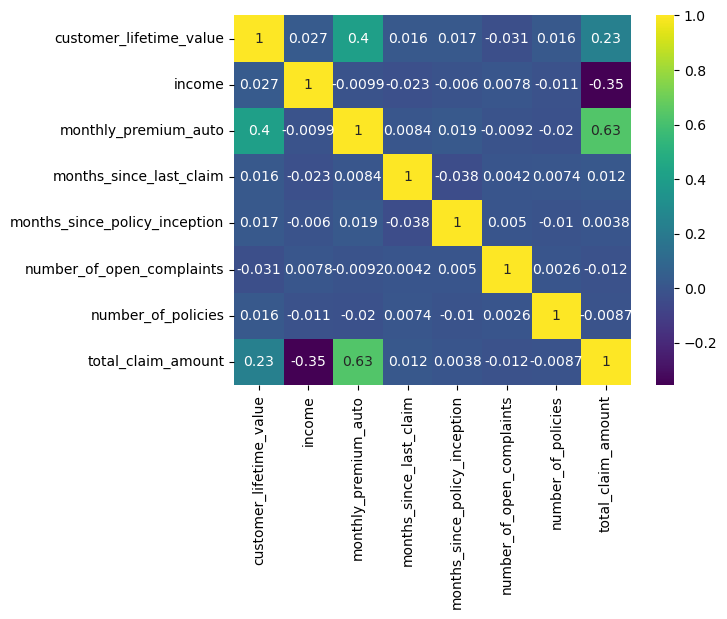

In [40]:
# Making the correlation information more clear with a heatmap

heatmap = sns.heatmap(df_numeric.corr(), cmap='viridis', annot=True)
heatmap

## Lab | Model generation and validation

Selected variables for linear regression will be those above 0.2 absolute correlation value based on Pearson coefficient. It includes:
- Customer lifetime value: 0.23
- Income: -0.35
- Monthly premium auto: 0.63

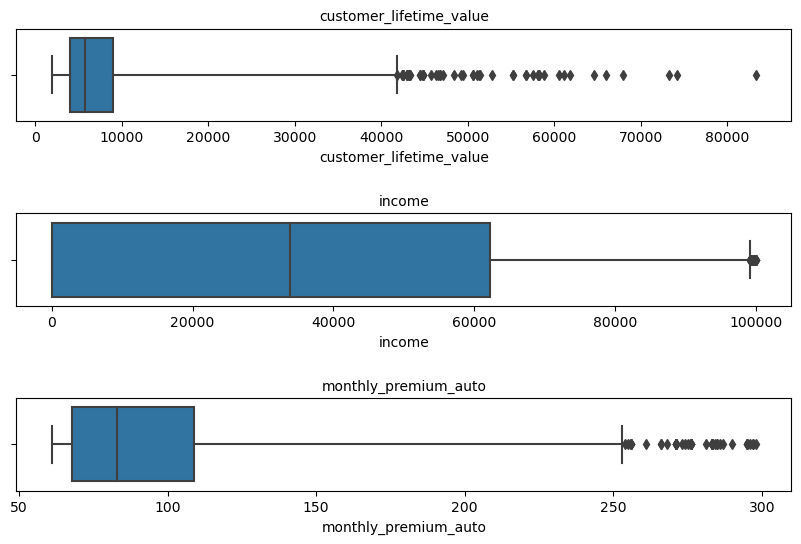

In [41]:
# Creating boxplots for selected variables to identify potential issues with outliers

predictor_cols = ['customer_lifetime_value', 'income', 'monthly_premium_auto']

fig, axes = plt.subplots(3, 1, figsize=(10, 6))

for i, col in enumerate(predictor_cols):
    sns.boxplot(x=df[col], whis=(0, 99.5), ax=axes[i])
    axes[i].set_title(col, fontsize=10) 

plt.subplots_adjust(hspace=1)      
    
plt.show()

Customer lifetime value and monthly premium seem to have a right skewed distribution, therefore the default value of whiskers show a lot of datapoints outside them. Most of them are values within the distribution instead of outliers. After playing with the whisker value in the above boxplots, we are only going to remove datapoints above the 99.5 percentile in those variables in order to get rid of several scattered datapoints.

In [42]:
# Filtering df to remove values of customer lifetime value and monthly premium auto columns above the 99.5th percentile

(print('Initial number of rows:', df.shape[0]))

# Removing outliers from customer lifetime value
df_no_outliers = df[df['customer_lifetime_value'] <= df['customer_lifetime_value'].quantile(0.995)]

(print('Number of rows after removing outliers from customer lifetime value:', df_no_outliers.shape[0]))

# Removing outliers from customer lifetime value
df_no_outliers = df_no_outliers[df_no_outliers['monthly_premium_auto'] <= df_no_outliers['monthly_premium_auto'].quantile(0.995)]

(print('Final number of rows:', df_no_outliers.shape[0]))

Initial number of rows: 10873
Number of rows after removing outliers from customer lifetime value: 10819
Final number of rows: 10764


#### Before splitting train and test sets, we need to drop columns expected not to be relevant to the model:
- Numerical columns with low correlation with the target variable
- Dates columns
- Customer column (unique identifier)

In [43]:
# Dropping columns

cols_to_drop = ['months_since_last_claim', 'months_since_policy_inception', 'number_of_open_complaints', 'number_of_policies', 'month', 'effective_to_date', 'customer']

df_selected_cols = df_no_outliers.drop(columns=cols_to_drop)

df_selected_cols.head()

,state,customer_lifetime_value,response,coverage,education,employmentstatus,gender,income,location_code,marital_status,monthly_premium_auto,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size
0,Arizona,4809.216960,No,Basic,College,Employed,M,48029,Suburban,Married,61,Corporate Auto,Corporate L3,Offer3,Agent,292.800000,Four-Door Car,Medsize
1,California,2228.525238,No,Basic,College,Unemployed,F,0,Suburban,Single,64,Personal Auto,Personal L3,Offer4,Call Center,744.924331,Four-Door Car,Medsize
2,Washington,14947.917300,No,Basic,Bachelor,Employed,M,22139,Suburban,Single,100,Personal Auto,Personal L3,Offer3,Call Center,480.000000,SUV,Medsize
3,Oregon,22332.439460,Yes,Extended,College,Employed,M,49078,Suburban,Single,97,Corporate Auto,Corporate L3,Offer2,Branch,484.013411,Four-Door Car,Medsize
4,Oregon,9025.067525,No,Premium,Bachelor,Medical Leave,F,23675,Suburban,Married,117,Personal Auto,Personal L2,Offer1,Branch,707.925645,Four-Door Car,Medsize


#### Next step is splitting dataset into train and test sets and creating dataframes from them.

In [44]:
# Splitting dataframe into X and y

y = df_selected_cols['total_claim_amount']

X = df_selected_cols.drop('total_claim_amount', axis=1)

In [45]:
# Splitting into train and test sets

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=13)

In [46]:
# Creating dataframes for X_train and X_test

X_train = pd.DataFrame(X_train, columns=X.columns)
X_test = pd.DataFrame(X_test, columns=X.columns)

print(X_train.shape)
print(X_test.shape)

(8611, 17)
(2153, 17)


In [47]:
X_train.dtypes

state                       object
customer_lifetime_value    float64
response                    object
coverage                    object
education                   object
employmentstatus            object
gender                      object
income                       int32
location_code               object
marital_status              object
monthly_premium_auto         int64
policy_type                 object
policy                      object
renew_offer_type            object
sales_channel               object
vehicle_class               object
vehicle_size                object
dtype: object

In [48]:
# Splitting X_train into numerical and categorical dataframes

X_train_num = X_train.select_dtypes(include='number')
X_train_cat = X_train.select_dtypes(include='object')

print(X_train_num.columns)
print(X_train_cat.columns)

Index(['customer_lifetime_value', 'income', 'monthly_premium_auto'], dtype='object')
Index(['state', 'response', 'coverage', 'education', 'employmentstatus',
       'gender', 'location_code', 'marital_status', 'policy_type', 'policy',
       'renew_offer_type', 'sales_channel', 'vehicle_class', 'vehicle_size'],
      dtype='object')


#### We will now try different transformations to try and convert the numerical df columns into normally distributed variables

array([[<Axes: title={'center': 'customer_lifetime_value'}>,
        <Axes: title={'center': 'income'}>],
       [<Axes: title={'center': 'monthly_premium_auto'}>, <Axes: >]],
      dtype=object)

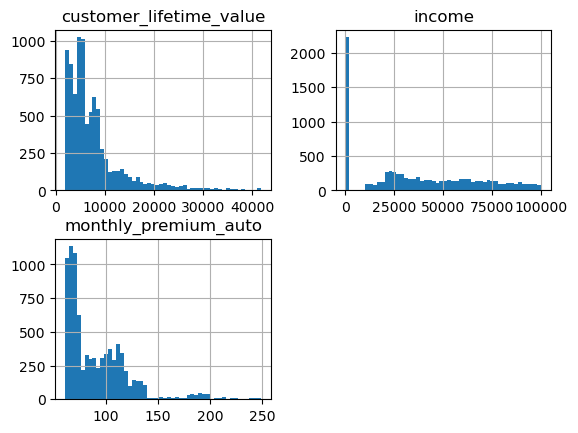

In [49]:
# Baseline

X_train_num.hist(bins=50)

array([[<Axes: title={'center': '0'}>, <Axes: title={'center': '1'}>],
       [<Axes: title={'center': '2'}>, <Axes: >]], dtype=object)

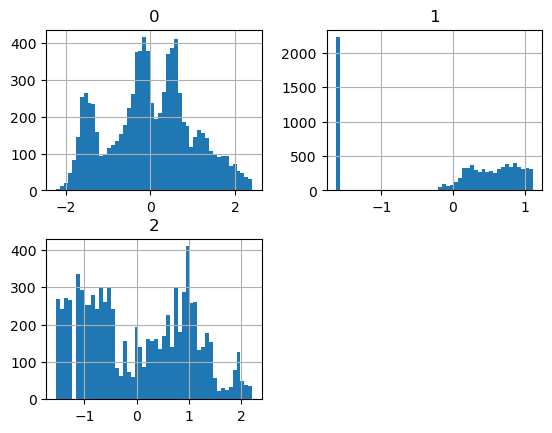

In [50]:
# Power transformer - Yeo-Johnson

from sklearn.preprocessing import PowerTransformer

X_train_num_copy = X_train_num.copy()

power_transformer = PowerTransformer()

X_train_num_power = pd.DataFrame(power_transformer.fit_transform(X_train_num_copy))

X_train_num_power.hist(bins=50)

array([[<Axes: title={'center': 'customer_lifetime_value'}>,
        <Axes: title={'center': 'income'}>],
       [<Axes: title={'center': 'monthly_premium_auto'}>, <Axes: >]],
      dtype=object)

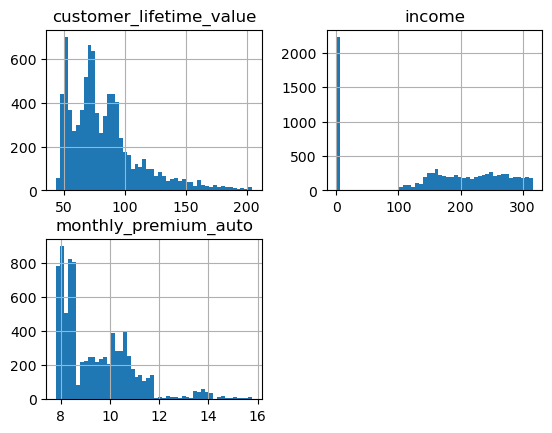

In [51]:
# Square root transformation

X_train_num_copy = X_train_num.copy()

X_train_num_sqrt = np.sqrt(X_train_num_copy)

X_train_num_sqrt.hist(bins=50)

array([[<Axes: title={'center': 'customer_lifetime_value'}>,
        <Axes: title={'center': 'income'}>],
       [<Axes: title={'center': 'monthly_premium_auto'}>, <Axes: >]],
      dtype=object)

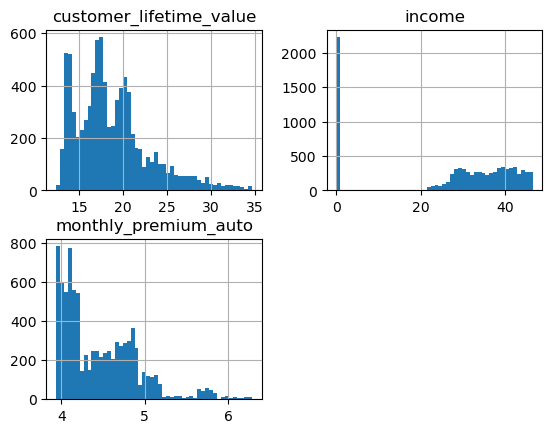

In [52]:
# Cube root transformation

X_train_num_copy = X_train_num.copy()

X_train_num_cbrt = np.cbrt(X_train_num_copy)

X_train_num_cbrt.hist(bins=50)

array([[<Axes: title={'center': 'customer_lifetime_value'}>,
        <Axes: title={'center': 'income'}>],
       [<Axes: title={'center': 'monthly_premium_auto'}>, <Axes: >]],
      dtype=object)

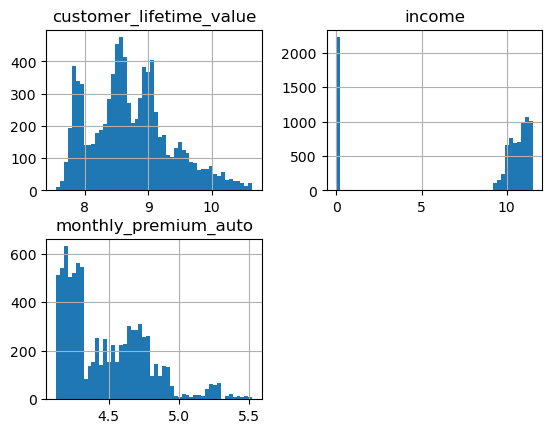

In [53]:
# Log1p transformation (log is not possible if we have zero values)

X_train_num_copy = X_train_num.copy()

X_train_num_log1p = np.log1p(X_train_num_copy)

X_train_num_log1p.hist(bins=50)

We will use the power transformer to transform all numerical columns.

array([[<Axes: title={'center': 'customer_lifetime_value'}>,
        <Axes: title={'center': 'income'}>],
       [<Axes: title={'center': 'monthly_premium_auto'}>, <Axes: >]],
      dtype=object)

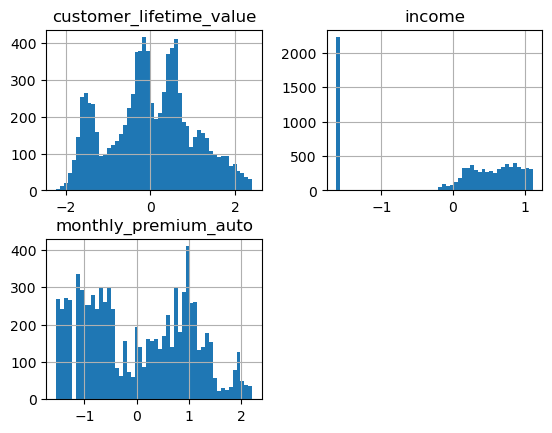

In [54]:
# Creating and fitting transformer

power_transformer = PowerTransformer()

X_train_num_trans = pd.DataFrame(power_transformer.fit_transform(X_train_num), columns=X_train_num.columns)

X_train_num_trans.hist(bins=50)

In [55]:
# Saving transformer as pickle file

import os
import pickle

path = "transformers/"
isExist = os.path.exists(path)
if not isExist:
    os.makedirs(path)
    print("The new directory is created!")

filename = "power_transformer.pkl"
with open(path+filename, "wb") as file:
    pickle.dump(power_transformer, file)

Applying same transformation to X_test without fitting to avoid data leakage.

array([[<Axes: title={'center': 'customer_lifetime_value'}>,
        <Axes: title={'center': 'income'}>],
       [<Axes: title={'center': 'monthly_premium_auto'}>, <Axes: >]],
      dtype=object)

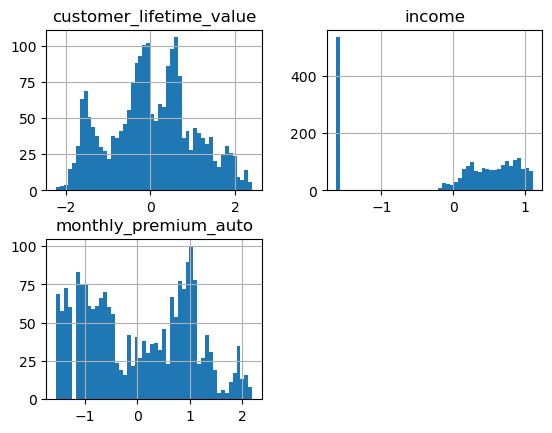

In [56]:
X_test_num = X_test.select_dtypes(include='number')
X_test_cat = X_test.select_dtypes(include='object')

X_test_num_trans = pd.DataFrame(power_transformer.transform(X_test_num), columns=X_test_num.columns)

X_test_num_trans.hist(bins=50)

#### Preprocessing categorical columns:
- One Hot Encoding for categorical nominal columns
- Replacing values with labels that follow the original order/rank of the variable

In [57]:
for col in X_train_cat:
    print(col, X_train_cat[col].unique(), '\n')

state ['Oregon' 'Washington' 'Arizona' 'California' 'Nevada'] 

response ['No' 'Yes'] 

coverage ['Basic' 'Premium' 'Extended'] 

education ['Bachelor' 'College' 'Master' 'High School or Below' 'Doctor'] 

employmentstatus ['Employed' 'Unemployed' 'Disabled' 'Medical Leave' 'Retired'] 

gender ['M' 'F'] 

location_code ['Suburban' 'Urban' 'Rural'] 

marital_status ['Single' 'Married' 'Divorced'] 

policy_type ['Personal Auto' 'Corporate Auto' 'Special Auto'] 

policy ['Personal L3' 'Corporate L1' 'Personal L2' 'Special L1' 'Personal L1'
 'Corporate L2' 'Corporate L3' 'Special L3' 'Special L2'] 

renew_offer_type ['Offer1' 'Offer3' 'Offer2' 'Offer4'] 

sales_channel ['Agent' 'Branch' 'Web' 'Call Center'] 

vehicle_class ['Two-Door Car' 'Four-Door Car' 'SUV' 'Luxury'] 

vehicle_size ['Medsize' 'Small' 'Large'] 



In [58]:
# Starting with nominals

from sklearn.preprocessing import OneHotEncoder

# Creating list and dfs with categorical nominal variables
cat_nominal = ['state', 'response', 'employmentstatus', 'gender', 'location_code', 'marital_status', 'policy_type', 'policy', 'renew_offer_type', 'sales_channel']
X_train_cat_nominal = X_train_cat[cat_nominal]
X_test_cat_nominal = X_test_cat[cat_nominal]

# Creating encoder object
ohencoder = OneHotEncoder(drop='first', sparse=False)

# fit_transform train set
X_train_catnom_encoded = ohencoder.fit_transform(X_train_cat_nominal)
X_train_catnom_encoded = pd.DataFrame(X_train_catnom_encoded, columns=ohencoder.get_feature_names_out(cat_nominal))

# saving encoder
path = "encoders/"
isExist = os.path.exists(path)
if not isExist:
    os.makedirs(path)
    print("The new directory is created!")

filename = "ohencoder.pkl"
with open(path+filename, "wb") as file:
    pickle.dump(ohencoder, file)

# transforming test set
X_test_catnom_encoded = ohencoder.transform(X_test_cat_nominal)
X_test_catnom_encoded = pd.DataFrame(X_test_catnom_encoded, columns=ohencoder.get_feature_names_out(cat_nominal))

C:\Users\Juan\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [59]:
display(X_train_catnom_encoded.head())
display(X_test_catnom_encoded.head())

,state_California,state_Nevada,state_Oregon,state_Washington,response_Yes,employmentstatus_Employed,employmentstatus_Medical Leave,employmentstatus_Retired,employmentstatus_Unemployed,gender_M,...,policy_Personal L3,policy_Special L1,policy_Special L2,policy_Special L3,renew_offer_type_Offer2,renew_offer_type_Offer3,renew_offer_type_Offer4,sales_channel_Branch,sales_channel_Call Center,sales_channel_Web
0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
4,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


,state_California,state_Nevada,state_Oregon,state_Washington,response_Yes,employmentstatus_Employed,employmentstatus_Medical Leave,employmentstatus_Retired,employmentstatus_Unemployed,gender_M,...,policy_Personal L3,policy_Special L1,policy_Special L2,policy_Special L3,renew_offer_type_Offer2,renew_offer_type_Offer3,renew_offer_type_Offer4,sales_channel_Branch,sales_channel_Call Center,sales_channel_Web
0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
3,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
4,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [60]:
# Now onto ordinals

from sklearn.preprocessing import OrdinalEncoder

# Creating list and dfs with categorical ordinal variables
cat_ordinal = ['coverage', 'education', 'vehicle_class', 'vehicle_size']
X_train_cat_ordinal = X_train_cat[cat_ordinal]
X_test_cat_ordinal = X_test_cat[cat_ordinal]

# Creating encoder object
ordencoder = OrdinalEncoder(categories=[['Basic', 'Premium', 'Extended'],
                                        ['High School or Below', 'Bachelor', 'College', 'Master', 'Doctor'],
                                        ['Two-Door Car', 'Four-Door Car', 'SUV', 'Luxury'],
                                        ['Small', 'Medsize', 'Large']])

# fit_transform train set
X_train_catord_encoded = ordencoder.fit_transform(X_train_cat_ordinal)
X_train_catord_encoded = pd.DataFrame(X_train_catord_encoded, columns=X_train_cat_ordinal.columns)

# saving encoder
path = "encoders/"
isExist = os.path.exists(path)
if not isExist:
    os.makedirs(path)
    print("The new directory is created!")

filename = "ordencoder.pkl"
with open(path+filename, "wb") as file:
    pickle.dump(ordencoder, file)

# transforming test set
X_test_catord_encoded = ordencoder.transform(X_test_cat_ordinal)
X_test_catord_encoded = pd.DataFrame(X_test_catord_encoded, columns=X_test_cat_ordinal.columns)

In [61]:
display(X_train_catord_encoded.head())
display(X_test_catord_encoded.head())

,coverage,education,vehicle_class,vehicle_size
0,0.0,1.0,0.0,1.0
1,0.0,2.0,1.0,1.0
2,0.0,2.0,1.0,1.0
3,0.0,3.0,1.0,0.0
4,0.0,0.0,1.0,1.0


,coverage,education,vehicle_class,vehicle_size
0,2.0,3.0,1.0,1.0
1,0.0,0.0,0.0,1.0
2,0.0,2.0,1.0,0.0
3,2.0,2.0,2.0,1.0
4,0.0,2.0,2.0,1.0


#### Merging all 3 dataframes from each set (transformed numerical, encoded categorical nominal, encoded categorical ordinal).

In [62]:
X_train_merged = pd.concat([X_train_num_trans, X_train_catnom_encoded, X_train_catord_encoded], axis=1)
X_test_merged = pd.concat([X_test_num_trans, X_test_catnom_encoded, X_test_catord_encoded], axis=1)

display(X_train_merged.head())
display(X_test_merged.head())

,customer_lifetime_value,income,monthly_premium_auto,state_California,state_Nevada,state_Oregon,state_Washington,response_Yes,employmentstatus_Employed,employmentstatus_Medical Leave,...,renew_offer_type_Offer2,renew_offer_type_Offer3,renew_offer_type_Offer4,sales_channel_Branch,sales_channel_Call Center,sales_channel_Web,coverage,education,vehicle_class,vehicle_size
0,0.352929,0.204639,-1.345187,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
1,0.536855,0.878346,-0.915462,0.0,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,2.0,1.0,1.0
2,-0.581236,-1.624796,-0.838540,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,1.0,1.0
3,-1.685688,0.155369,-1.441323,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,3.0,1.0,0.0
4,0.375249,0.375502,-1.163641,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0


,customer_lifetime_value,income,monthly_premium_auto,state_California,state_Nevada,state_Oregon,state_Washington,response_Yes,employmentstatus_Employed,employmentstatus_Medical Leave,...,renew_offer_type_Offer2,renew_offer_type_Offer3,renew_offer_type_Offer4,sales_channel_Branch,sales_channel_Call Center,sales_channel_Web,coverage,education,vehicle_class,vehicle_size
0,0.191623,0.889694,-0.091748,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,2.0,3.0,1.0,1.0
1,-1.923148,-1.624796,-0.995188,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2,0.454292,0.723293,-1.163641,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,2.0,1.0,0.0
3,0.854780,0.742249,1.359595,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,2.0,2.0,2.0,1.0
4,0.513086,-1.624796,1.069065,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,2.0,2.0,1.0


#### Next step will be scaling the values of every column to be between 0 and 1 with MinMaxScaler

In [63]:
from sklearn.preprocessing import MinMaxScaler

# creating scaler object
scaler = MinMaxScaler()

# fit transform on train set
X_train_scaled = scaler.fit_transform(X_train_merged)
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=X_train_merged.columns)

# saving scaler
path = "scalers/"
isExist = os.path.exists(path)
if not isExist:
    os.makedirs(path)
    print("The new directory is created!")

filename = "minmaxscaler.pkl"
with open(path+filename, "wb") as file:
    pickle.dump(scaler, file)
    
# transforming also test set
X_test_scaled = scaler.transform(X_test_merged)
X_test_scaled_df = pd.DataFrame(X_test_scaled, columns=X_test_merged.columns)

In [64]:
display(X_train_scaled_df.head())
display(X_test_scaled_df.head())

,customer_lifetime_value,income,monthly_premium_auto,state_California,state_Nevada,state_Oregon,state_Washington,response_Yes,employmentstatus_Employed,employmentstatus_Medical Leave,...,renew_offer_type_Offer2,renew_offer_type_Offer3,renew_offer_type_Offer4,sales_channel_Branch,sales_channel_Call Center,sales_channel_Web,coverage,education,vehicle_class,vehicle_size
0,0.557026,0.669307,0.052322,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.25,0.000000,0.5
1,0.596789,0.915785,0.166970,0.0,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.50,0.333333,0.5
2,0.355067,0.000000,0.187493,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.50,0.333333,0.5
3,0.116294,0.651281,0.026674,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.75,0.333333,0.0
4,0.561851,0.731818,0.100758,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.333333,0.5


,customer_lifetime_value,income,monthly_premium_auto,state_California,state_Nevada,state_Oregon,state_Washington,response_Yes,employmentstatus_Employed,employmentstatus_Medical Leave,...,renew_offer_type_Offer2,renew_offer_type_Offer3,renew_offer_type_Offer4,sales_channel_Branch,sales_channel_Call Center,sales_channel_Web,coverage,education,vehicle_class,vehicle_size
0,0.522153,0.919937,0.386733,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.75,0.333333,0.5
1,0.064957,0.000000,0.145700,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.00,0.000000,0.5
2,0.578939,0.859059,0.100758,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.50,0.333333,0.0
3,0.665521,0.865994,0.773943,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.50,0.666667,0.5
4,0.591650,0.000000,0.696431,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.50,0.666667,0.5


## Training our multivariate linear model

In [66]:
from sklearn.linear_model import LinearRegression

# creating linear model instance
lm = LinearRegression()

# fitting to train set
lm.fit(X_train_scaled_df, y_train)

# saving linear model
path = "models/"
isExist = os.path.exists(path)
if not isExist:
    os.makedirs(path)
    print("The new directory is created!")

filename = "linear_model.pkl"
with open(path+filename, "wb") as file:
    pickle.dump(lm, file)

The new directory is created!


## Evaluating our lineal model

### Getting predictions

In [67]:
# using our linear model to get predictions from train and test set

y_train_pred = lm.predict(X_train_scaled_df)
y_test_pred = lm.predict(X_test_scaled_df)

In [68]:
# creating a dictionary comparing train to set predictions

results = {"Set": ["Train"]*X_train.shape[0] + ["Test"]*X_test.shape[0], 
           "Real": list(y_train) + list(y_test),
           "Predicted": list(y_train_pred) + list(y_test_pred)}

results_df = pd.DataFrame(results)
results_df.head()

,Set,Real,Predicted
0,Train,302.400000,375.359752
1,Train,305.121363,206.135041
2,Train,433.959806,515.975362
3,Train,297.600000,333.877877
4,Train,338.619869,433.558164


In [69]:
# adding another column with the errors of the model, calculating the difference between real and predicted values

results_df['Errors'] = results_df['Real'] - results_df['Predicted']
results_df.head()

,Set,Real,Predicted,Errors
0,Train,302.400000,375.359752,-72.959752
1,Train,305.121363,206.135041,98.986322
2,Train,433.959806,515.975362,-82.015556
3,Train,297.600000,333.877877,-36.277877
4,Train,338.619869,433.558164,-94.938295


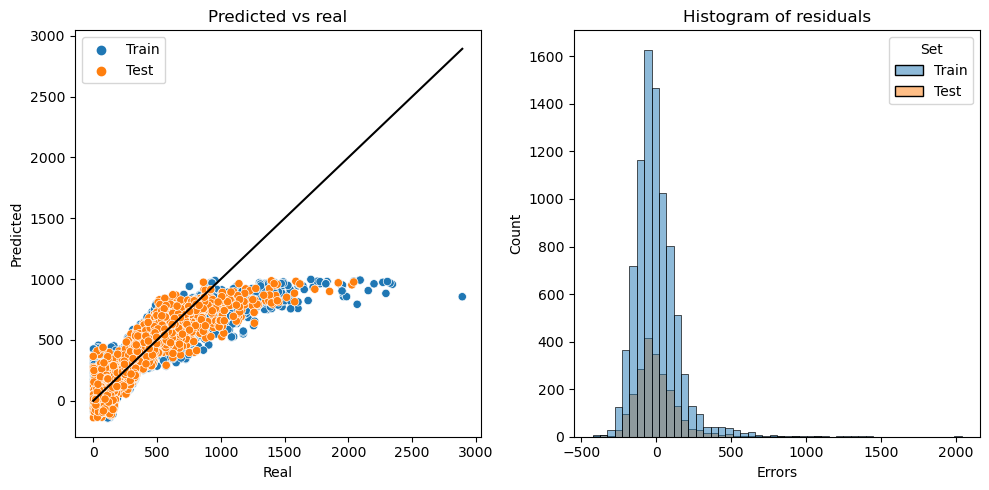

In [71]:
# plotting results and error distribution

fig, ax = plt.subplots(1,2, figsize=(10,5))

sns.scatterplot(results_df, x="Real", y="Predicted", hue="Set", ax=ax[0])
sns.lineplot(results_df, x="Real", y="Real", color="black", ax=ax[0])
ax[0].set_title("Predicted vs real")
sns.histplot(results_df, x="Errors", bins=50, hue="Set", ax=ax[1])
ax[1].set_title("Histogram of residuals")

plt.tight_layout()
plt.show()

As we see, our linear model does not perform well at predicting our real values.
- Scatter plot shows a decent performance with smaller values, but gets increasingly bad when values start to increase
- Histogram of residuals spikes around zero, but is positively skewed, with a right tail that represents our errors with the larger values

### Computing error metrics for our model

#### Mean Absolute Error (MAE)

In [79]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

mae_train = mean_absolute_error(y_train, y_train_pred)
mae_test = mean_absolute_error(y_test, y_test_pred)

print(f'MAE of train set predictions: {mae_train}')
print(f'MAE of test set predictions: {mae_test}')

MAE of train set predictions: 104.54986840143764
MAE of test set predictions: 104.31026073361967


#### Mean Squared Error (MSE)

In [80]:
mse_train = mean_squared_error(y_train, y_train_pred)
mse_test = mean_squared_error(y_test, y_test_pred)

print(f'MSE of train set predictions: {mse_train}')
print(f'MSE of test set predictions: {mse_test}')

MSE of train set predictions: 23358.01606066687
MSE of test set predictions: 21341.173531221302


#### Root Mean Squared Error (RMSE)

In [81]:
rmse_train = mean_squared_error(y_train, y_train_pred, squared=False)
rmse_test = mean_squared_error(y_test, y_test_pred, squared=False)

print(f'RMSE of train set predictions: {rmse_train}')
print(f'RMSE of test set predictions: {rmse_test}')

RMSE of train set predictions: 152.83329500035936
RMSE of test set predictions: 146.08618528533526


#### R2 Score

In [82]:
r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)

print(f'R2 score of train set predictions: {r2_train}')
print(f'R2 score of test set predictions: {r2_test}')

R2 score of train set predictions: 0.7007792090237802
R2 score of test set predictions: 0.7080950629237768


In [83]:
# summarizing error metrics in a dataframe through a function

def error_metrics_report(y_real_train: list, y_real_test: list, y_pred_train: list, y_pred_test: list) -> pd.DataFrame:
    '''
    - Takes lists of real and predicted values from train and test sets.
    - Computes different error metrics (MAE, MSE, RMSE, R2)
    - Creates a dictionary with 3 key/value pairs (metrics, train metrics, test metrics)
    - Outputs a dataframe created from the dictionary
    '''
    
    # Mean absolute error
    MAE_train = mean_absolute_error(y_real_train, y_pred_train)
    MAE_test  = mean_absolute_error(y_real_test, y_pred_test)

    # Mean squared error
    MSE_train = mean_squared_error(y_real_train, y_pred_train)
    MSE_test  = mean_squared_error(y_real_test, y_pred_test)

    # Root mean squared error
    RMSE_train = mean_squared_error(y_real_train, y_pred_train, squared=False)
    RMSE_test  = mean_squared_error(y_real_test, y_pred_test, squared=False)

    # R2
    R2_train = r2_score(y_real_train, y_pred_train)
    R2_test  = r2_score(y_real_test, y_pred_test)

    results = {"Metric": ['MAE', 'MSE', 'RMSE', 'R2'], 
               "Train": [MAE_train, MSE_train, RMSE_train, R2_train],
               "Test":  [MAE_test, MSE_test, RMSE_test, R2_test]}

    results_df = pd.DataFrame(results).round(2)

    return results_df

error_metrics_report(list(results_df[results_df["Set"]=="Train"]["Real"]),
                     list(results_df[results_df["Set"]=="Test"]["Real"]),
                     list(results_df[results_df["Set"]=="Train"]["Predicted"]),
                     list(results_df[results_df["Set"]=="Test"]["Predicted"]))

,Metric,Train,Test
0,MAE,104.55,104.31
1,MSE,23358.02,21341.17
2,RMSE,152.83,146.09
3,R2,0.70,0.71


## Conclusion

Even though the mean error metrics are not terrible and the R2 score looks half decent, our model does not do a good job predicting the real values in this dataset. Some considerations regarding the performance and how to potentially improve:
- There were no features highly correlated with the target variable, which is relevant for linear models
- Preprocessing could be optimized
    - Different transformations for the numerical variables
    - Better selection/encoding of categorical columns
    - Feature engineering
- Might be a good idea to try different model parameters and compare performance